Задание 2. Временные ряды. Новиков Дмитрий. Вариант "Yakutsk".

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv("russian_passenger_air_service.csv")
df

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,Yakutsk,2007,27636.0,25976.0,34291.0,38803.0,38478.0,59142.0,67295.0,75257.0,52681.0,44505.0,40439.0,1916.60,545577.0,"(Decimal('129.750225'), Decimal('62.086594'))"
3957,Yakutsk (Magan),2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(Decimal('-6.226888'), Decimal('8.607871'))"
3958,Yamburg,2007,6239.0,3195.0,6648.0,6268.0,6088.0,6028.0,5975.0,6024.0,6262.0,6451.0,6968.0,8.87,72626.0,"(Decimal('75.097783'), Decimal('67.980026'))"
3959,Yaroslavl (Tunoshna),2007,557.0,720.0,650.0,411.0,328.0,864.0,688.0,965.0,883.0,505.0,640.0,2055.60,8277.0,"(Decimal('40.170054'), Decimal('57.56231'))"


In [4]:
df.groupby('Airport name').groups

{'Abakan': [0, 250, 501, 749, 1041, 1333, 1625, 1917, 2209, 2501, 2793, 3085, 3377, 3669], 'Achinsk': [760, 1052, 1344, 1636, 1928, 2220, 2512, 2804, 3096, 3388, 3680], 'Aikhal': [1, 251, 502, 750, 1042, 1334, 1626, 1918, 2210, 2502, 2794, 3086, 3378, 3670], 'Amderma': [3, 253, 504, 752, 1044, 1336, 1628, 1920, 2212, 2504, 2796, 3088, 3380, 3672], 'Anadyr': [505, 753, 1045, 1337, 1629, 1921, 2213, 2505, 2797, 3089, 3381, 3673], 'Anadyr (Carbon)': [4, 254], 'Anapa (Vitjazevo)': [5, 255, 506, 754, 1046, 1338, 1630, 1922, 2214, 2506, 2798, 3090, 3382, 3674], 'Antypayuta': [755, 1047, 1339, 1631, 1923, 2215, 2507, 2799, 3091, 3383, 3675], 'Apatite (Khibiny)': [6, 256, 507, 756, 1048, 1340, 1632, 1924, 2216, 2508, 2800, 3092, 3384, 3676], 'Arkhangelsk (Talagy)': [8, 258, 509, 758, 1050, 1342, 1634, 1926, 2218, 2510, 2802, 3094, 3386, 3678], 'Arkhangelsk (Vaskovo)': [7, 257, 508, 757, 1049, 1341, 1633, 1925, 2217, 2509, 2801, 3093, 3385, 3677], 'Astrakhan (Narimanovo)': [9, 259, 510, 759, 10

In [5]:
Yakutsk = df.groupby('Airport name').get_group('Yakutsk')
Yakutsk = Yakutsk[Yakutsk['Year']<2020]
Yakutsk

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
496,Yakutsk,2019,51858.0,51326.0,65188.0,73161.0,70950.0,93695.0,115339.0,118026.0,92665.0,78531.0,69091.0,1256.78,949746.0,"(Decimal('129.750225'), Decimal('62.086594'))"
744,Yakutsk,2018,51639.0,49959.0,61877.0,68345.0,68480.0,93922.0,108364.0,113964.0,90958.0,71375.0,63911.0,1226.69,908384.0,"(Decimal('129.750225'), Decimal('62.086594'))"
1036,Yakutsk,2017,49666.0,48331.0,62926.0,67360.0,68018.0,94852.0,106553.0,110232.0,89084.0,76601.0,62824.0,1448.48,902463.0,"(Decimal('129.750225'), Decimal('62.086594'))"
1328,Yakutsk,2016,43390.0,42573.0,54505.0,62886.0,62138.0,97492.0,111995.0,119348.0,87092.0,70995.0,58681.0,1506.75,875869.0,"(Decimal('129.750225'), Decimal('62.086594'))"
1620,Yakutsk,2015,49686.0,44298.0,55546.0,60236.0,60965.0,92948.0,113191.0,117341.0,88150.0,73080.0,56743.0,1473.86,871875.0,"(Decimal('129.750225'), Decimal('62.086594'))"
1912,Yakutsk,2014,48869.0,47382.0,60913.0,64637.0,63312.0,85927.0,105513.0,111752.0,84958.0,74096.0,60721.0,1443.24,870040.0,"(Decimal('129.750225'), Decimal('62.086594'))"
2204,Yakutsk,2013,43111.0,41027.0,54894.0,58929.0,61118.0,83947.0,102772.0,110087.0,83320.0,73801.0,63311.0,1868.57,840479.0,"(Decimal('129.750225'), Decimal('62.086594'))"
2496,Yakutsk,2012,36507.0,35314.0,44741.0,49138.0,50741.0,78731.0,98308.0,106400.0,77287.0,60552.0,53835.0,1752.62,747129.0,"(Decimal('129.750225'), Decimal('62.086594'))"
2788,Yakutsk,2011,31425.0,28261.0,40118.0,45515.0,45802.0,65743.0,83220.0,92363.0,68010.0,52145.0,48183.0,1716.60,649246.0,"(Decimal('129.750225'), Decimal('62.086594'))"
3080,Yakutsk,2010,27916.0,28152.0,35719.0,40624.0,40540.0,60362.0,74918.0,81080.0,61147.0,48181.0,37818.0,1649.85,577323.0,"(Decimal('129.750225'), Decimal('62.086594'))"


In [6]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
Yakutsk['December'] = Yakutsk['Whole year']  - Yakutsk[months[:-1]].sum(axis = 1)
#Декабрь в базе приведен неверно - надо из всего года вычесть все остальные месяцы
A = np.array(Yakutsk[months])[::-1]
#года переставили в порядке возрастания
A1 = A.flatten()
#Эта функция вытягивает двумерный массив в одномерный

AInThousand=A1/1000
#Рассмотрим все в тысячах

Data = pd.DataFrame(AInThousand, columns = ['pas'])
Data


,pas
0,27.636
1,25.976
2,34.291
3,38.803
4,38.478
...,...
151,118.026
152,92.665
153,78.531
154,69.091


<AxesSubplot:>

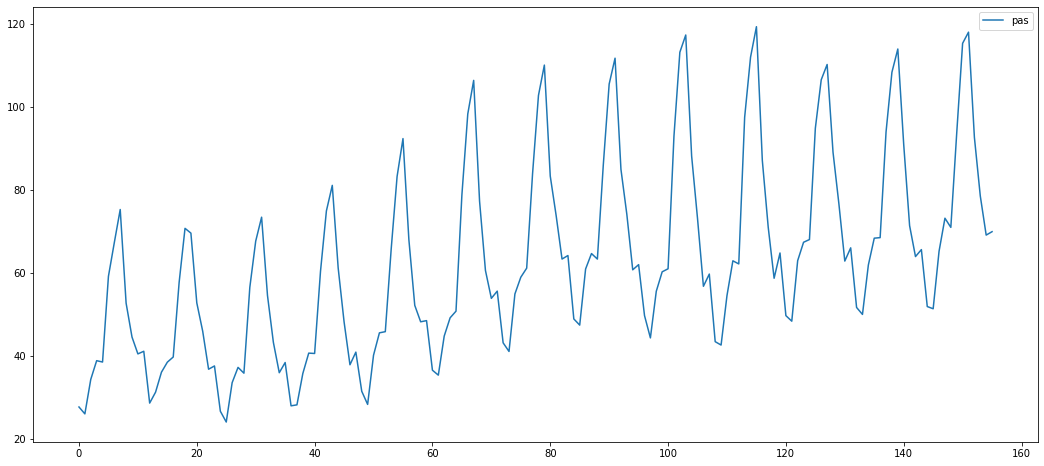

In [7]:
Data.plot(figsize=(18,8))

Пока что несколько слов очень нестрого и не факт, что правильно: с 15 по 120 месяцы был тренд на рост пикового пассажиропотока, затем произошёл спад и снова возник тренд на рост пикового пассажиропотока. На графике видна очень сильная сезонность изменений, из которого следует нестационарность ряда.

Автокорреляция - статистическая взаимосвязь между последовательностями величин одного ряда, взятыми со сдвигом (например, для случайного процесса — со сдвигом по времени):
$$
r_{\tau}=\frac{\mathbb{E}\left(\left(y_{t}-\mathbb{E} y\right)\left(y_{t+\tau}-\mathbb{E} y\right)\right)}{\mathbb{D} y}
$$
$r_{\tau} \in[-1,1], \quad \tau-$ лаг автокорреляции.
Выборочная автокорреляция:
$$
r_{\tau}=\frac{\sum_{t=1}^{T-\tau}\left(y_{t}-\bar{y}\right)\left(y_{t+\tau}-\bar{y}\right)}{\sum_{t=1}^{T}\left(y_{t}-\bar{y}\right)^{2}}
$$


критерий Дики-Фуллера:<br>
временной ряд: $\quad y^{T}=y_{1}, \ldots, y_{T}$; <br>
нулевая гипотеза: $H_{0}:$ ряд нестационарен;<br>
альтернатива: $H_{1}:$ ряд стационарен;<br>
статистика: неважно;<br>
нулевое распределение: табличное.<br>

Проведем тест Дики-Фуллера<br><br>
H0: есть единичный корень , т.е.  СТАЦИОНАРНОСТИ - НЕТ<br>
Критическое множество - ЛЕВОСТОРОННЕЕ<br><br>

В ответе - первой строчкой значение статистики, а потом в фигурных скобках перечислены критические точки для трех уровней значимости (КРИТИЧЕСКОЕ МНОЖЕСТВО - ВЛЕВО!) 

In [8]:
test = sm.tsa.adfuller(Data['pas'])
test

(-0.5302832040930763,
 0.88597023464267,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 741.8901710483725)

На трех предложенных уровнях значимости H0 ПРИНИМАЕТСЯ - стационарности НЕТ.

Переходим к первым разностям - вместо $X_n$  рассматриваем $Y_n = X_n - X_{n-1}$. Смысл - это "дискретное дифференцирование".  - если функция линейна, то ее производная постоянна, если ряд имел линейный тренд, то есть
$X_n = an + \beta_1 X_{n-1}+... +\varepsilon_n$, то у $Y_n$ уже тренда не будет. 

$X_n = an + \beta_1 X_{n-1}+... +\varepsilon_n$

$X_{n-1} = a(n-1) + \beta_1 X_{n-2}+... +\varepsilon_n$

$Y_n = a + \beta_1 Y_{n-1}+... +\varepsilon_n - \varepsilon_{n-1}$

In [9]:
Datadiff1 = Data.diff(periods=1).dropna()

Теперь опять Дики-Фуллер

In [10]:
test1 = sm.tsa.adfuller(Datadiff1['pas'])
test1

(-4.679673686957135,
 9.187125397145567e-05,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 735.2808274062274)

Отвергаем нулевую гипотезу на всех уровнях значимости, то есть стационарность есть.

Теперь нарисуем первые разности

(но тут прослеживается сезонность... вроде...)

<AxesSubplot:>

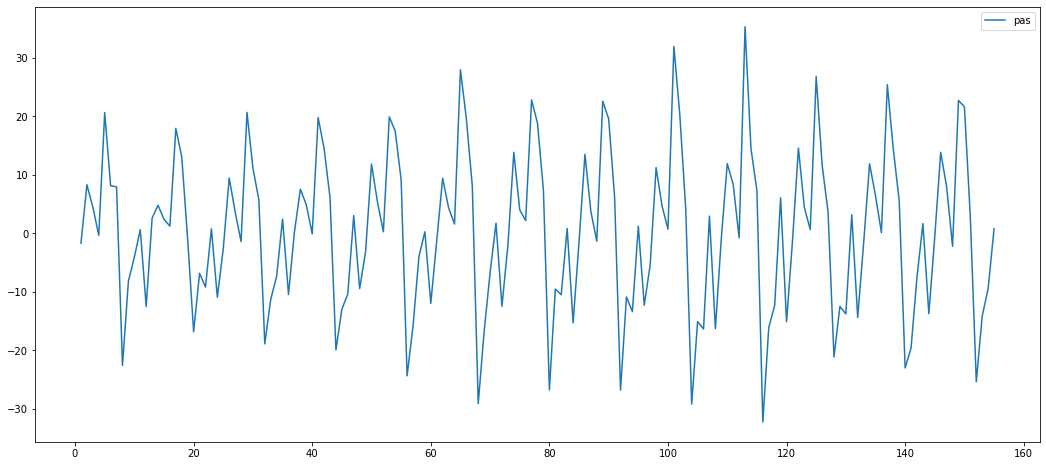

In [11]:
Datadiff1.plot(figsize=(18,8))

### Начинаем подбирать модель  класса ARIMA(p,d,q) - AutoRegressive Integrated Moving Average
(Если d-продифференцированный ряд описывается моделью ARMA(p,q))
$A R M A(p, q): \quad y_{t}=\alpha+\phi_{1} y_{t-1}+\cdots+\phi_{p} y_{t-p}+\varepsilon_{t}+\theta_{1} \varepsilon_{t-1}+\theta_{2} \varepsilon_{t-2}+\cdots+\theta_{q} \varepsilon_{t-q}$,
где $y_{t}-$ стационарный ряд, $\varepsilon_{t}-$ гауссов белый шум с нулевым средним и постоянной дисперсией $\sigma_{\varepsilon}^{2}$.
Другой способ записи:
$$
\phi(B) y_{t}=\theta(B) \varepsilon_{t}
$$
Теорема Вольда: любой стационарный ряд может быть описан моделью $A R M A(p, q)$ с любой точностью.

AR - авторегрессия, p - порядок регрессии

I - интегрированность, d - порядок интегрированности ряда (сколько раз переходили к разностям): в нашем случае d = 1

MA - moving average - скользящее среднее, q - его порядок скользящего среднего



$Y_n = a + \beta_1 Y_{n-1}+... +\beta_p Y_{n-p} + \alpha_1 \varepsilon_{n-1}+... +\alpha_q \varepsilon_{n-q} +\varepsilon_n$

Главная задача - подобрать числа (p,d,q)

Для подбора модели стоит рассмотреть автокорреляционные функции: ACF и PACF

ПРАВИЛО: 

если (например) у ACF 5 заметных столбиков, а остальные совсем нули, то p=0, q=5

если (например) у PACF 5 заметных столбиков, а остальные совсем нули, то p=5, q=0

Но такие явные модели встречаются редко.

И все же полезно нарисовать ACF и PACF


(при разных лагах)

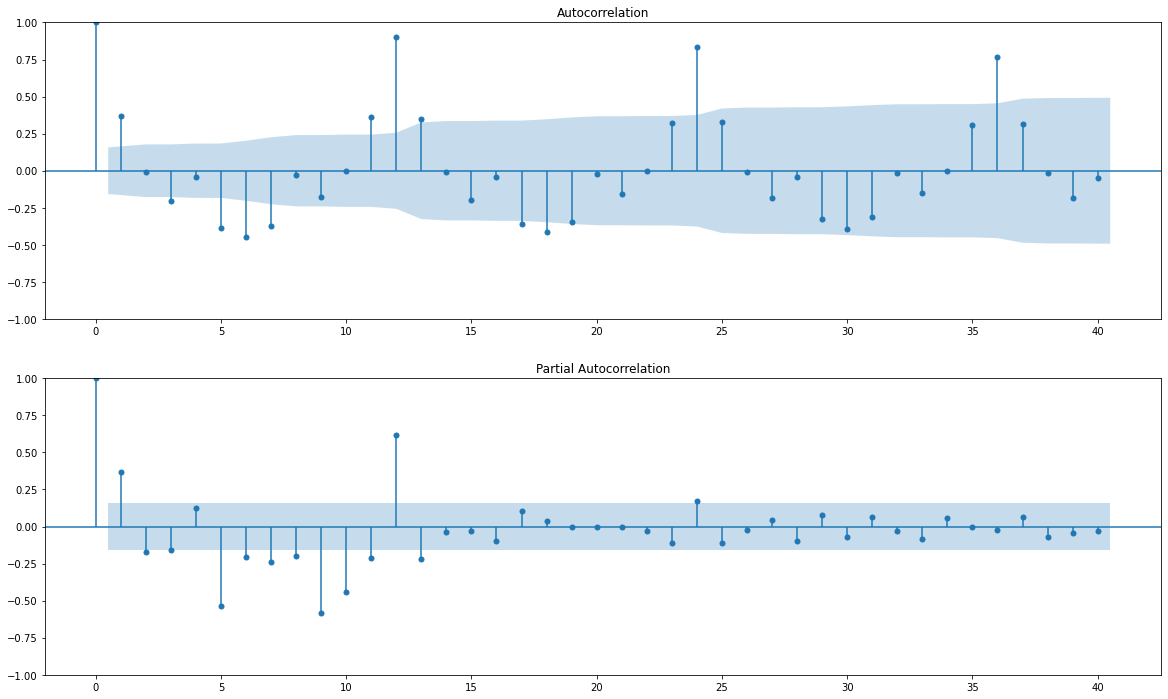

In [12]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Datadiff1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Datadiff1, lags=40, ax=ax2, method='ywm')

Этот ряд уже похож на стационарный, но совершенно дикая сезонность, что и показывают автокорелляционные функции, по которым нельзя понять совершенно НИЧЕГО. Кроме того, что придется учитывать сезонность

### SARIMA

S - сезонность

Пусть ряд имеет сезонный период длины $S$.
Возьмём модель $A R M A(p, q)$ :
$$
y_{t}=\alpha+\phi_{1} y_{t-1}+\cdots+\phi_{p} y_{t-p}+\varepsilon_{t}+\theta_{1} \varepsilon_{t-1}+\cdots+\theta_{q} \varepsilon_{t-q}
$$
и добавим $P$ авторегрессионных компонент:
$$
+\phi_{S} y_{t-S}+\phi_{2 S} y_{t-2 S}+\cdots+\phi_{P S} y_{t-P S}
$$
и $Q$ компонент скользящего среднего:
$$
+\theta_{S} \varepsilon_{t-S}+\theta_{2 S} \varepsilon_{t-2 S}+\cdots+\theta_{P S} \varepsilon_{t-Q S} .
$$
Это модель $S A R M A(p, q) \times(P, Q)$

Но все же попробуем подобрать модель - Ljung-Box (Q): проверяет что остатки образуют белый шум - это нулевая гипотеза - значит p-value должно быть большим,  Jarque-Bera (JB) проверяет остатки на нормальность - p-value должно быть тоже большим

Q-критерий Льюнга-Бокса: <br>
ряд ошибок прогноза: $\quad \varepsilon^{T}=\varepsilon_{1}, \ldots, \varepsilon_{T}$; <br>
нулевая гипотеза: $\quad H_{0}: r_{1}=\cdots=r_{L}=0$;<br>
альтернатива: $\quad H_{1}: H_{0}$ неверна;<br>
статистика: $\quad Q\left(\varepsilon^{T}\right)=T(T+2) \sum_{\tau=1}^{L} \frac{r_{\tau}^{2}}{T-\tau}$;<br>
нулевое распределение: $\quad \chi_{L-K}^{2}, K-$ число настраиваемых параметров модели ряда.<br>

НЕ должно быть сообщений об ошибках

In [22]:
M = sm.tsa.statespace.SARIMAX(Data[:144], order=[1, 1, 0], seasonal_order=[4, 1, 0, 12], trend=None).fit()
print(M.summary())

# p=1, d=1, q=0
# что касается сезонности - 

#учитываются AR(4) (то есть предыдущие значения ряда) но с интервалом в 12 месяцев, 

#d = 1, 

#учитываются MA(1) (то есть 1 предыдущая ошибка) но с интервалом в 12 месяцев

                                     SARIMAX Results                                      
Dep. Variable:                                pas   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(4, 1, 0, 12)   Log Likelihood                -333.999
Date:                            Mon, 30 May 2022   AIC                            679.999
Time:                                    14:06:30   BIC                            697.250
Sample:                                         0   HQIC                           687.009
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1674      0.090     -1.865      0.062      -0.343       0.009
ar.S.L12      -0.3688      0.093   

In [25]:
M1 = sm.tsa.statespace.SARIMAX(Data[:144], order=[1, 1, 0], seasonal_order=[2, 1, 0, 12], trend=None).fit()
print(M1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                pas   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -335.781
Date:                            Mon, 30 May 2022   AIC                            679.561
Time:                                    14:07:35   BIC                            691.062
Sample:                                         0   HQIC                           684.234
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1718      0.083     -2.081      0.037      -0.334      -0.010
ar.S.L12      -0.3488      0.087   

Prob(Q) = 0.91 - принимаем нулевую гипотезу, т.е. остатки образуют белый шум


Prob(JB) = 0.15 - принимаем нулевую гипотезу, остатки нормальны

Построим прогноз (пока оставаясь в неведении о его теоретической формуле)

In [23]:
print(M.forecast(12))

144     51.868364
145     49.334126
146     61.357415
147     67.527245
148     68.009387
149     96.396940
150    111.155719
151    116.128614
152     91.687613
153     73.613690
154     63.259382
155     65.900661
Name: predicted_mean, dtype: float64


## Суть прогнозирования:

Например (см. таблицу с коэффициентами)
$$x_{100} = -0.1674 * x_{99} -0.3688	* x_{88} -0.1976 * x_{76} -0.1207 * x_{64} + 0.1234 * x_{52}$$

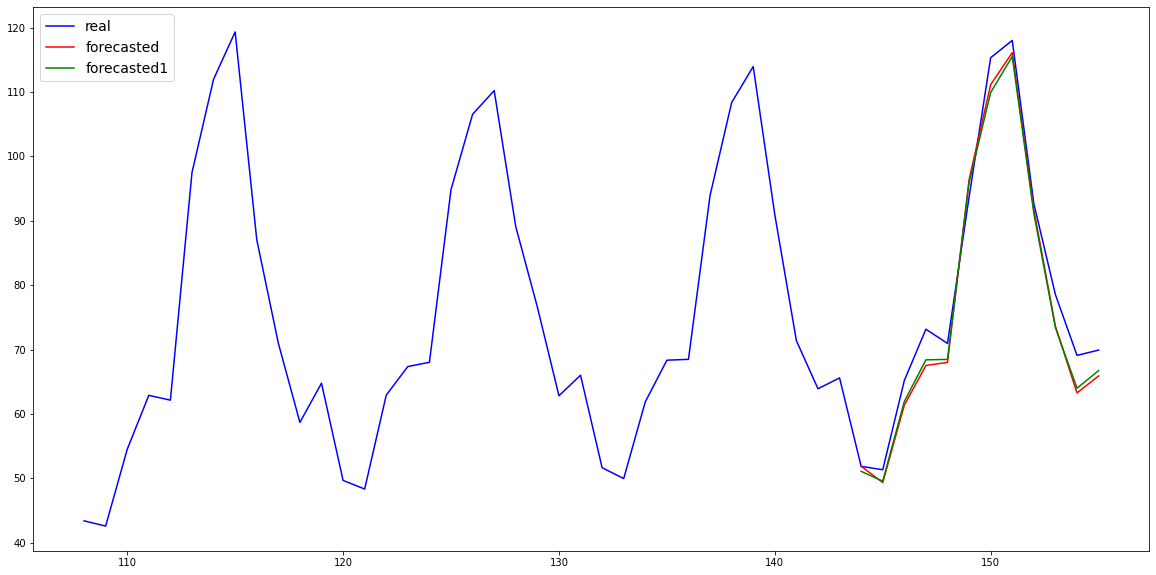

In [26]:
plt.figure(figsize=(20,10))
plt.plot(Data[108:]['pas'],color='blue',label='real')
plt.plot( M.forecast(12), color='red',label='forecasted' )
plt.plot( M1.forecast(12), color='green',label='forecasted1' )
plt.legend(loc='best', fontsize = 14)
plt.show()